# Medical Cost Personal Insurance Project 

In [239]:
# importing the required libraries. 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [240]:
url = 'https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv'
df = pd.read_csv(url)

In [241]:
# check for the first 5 rows and the columns of the dataframe.
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [242]:
# check for the last 5 rows and the columns of the dataframe.
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [243]:
# checking the shape and size of the dataset.
df.shape

(1338, 7)

In [244]:
print ("No. of rows",df.shape[0])
print ("No. of columns",df.shape[1])

No. of rows 1338
No. of columns 7


In [245]:
# chceking the columns:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

In [246]:
#Gaining information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [247]:
# to check for null values in the dataset. 
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

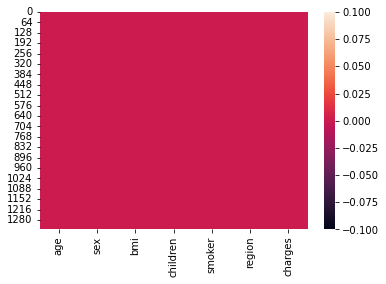

In [248]:
#Lets visualise it using the heat map.
sns.heatmap(df.isnull())

It is noticed that we dont have any missing values in the dataframe.

In [249]:
#Checking the statistics of the dataframe.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [250]:
# seperating the categorical and the numerical data. 

categorical_col = []
for i in df.dtypes.index:
    if df.dtypes[i]=="object": 
        categorical_col.append(i)
print("Categorical Columns :  ",categorical_col)
print("/n")

numerical_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != "object": 
        numerical_col.append(i)
print("Numerical Columns :  ",numerical_col)
print("/n")

Categorical Columns :   ['sex', 'smoker', 'region']
/n
Numerical Columns :   ['age', 'bmi', 'children', 'charges']
/n


C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


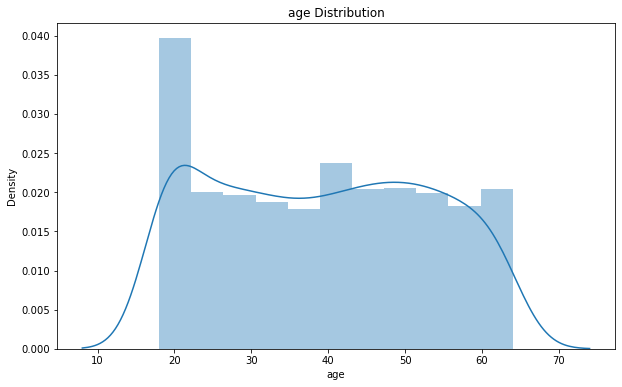

In [251]:
plt.figure(figsize=(10, 6))
sns.distplot(df['age'])
plt.title('age Distribution')
plt.show()

#It is observed from the data that the highest no. of people are ranging between 17 to 23 approx. 


male      676
female    662
Name: sex, dtype: int64


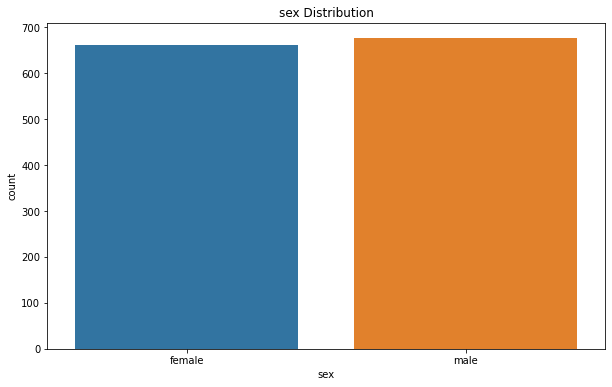

In [252]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('sex Distribution')
print(df['sex'].value_counts())
plt.show()

It is observed from the dataframe that there are approx. equal no. of genden distribution. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


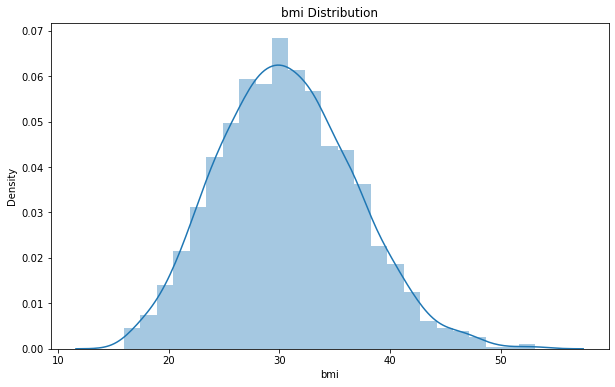

In [253]:
plt.figure(figsize=(10, 6))
sns.distplot(df['bmi'])
plt.title('bmi Distribution')
plt.show()

#The distribution looks like a normal distribution curve. 

no     1064
yes     274
Name: smoker, dtype: int64


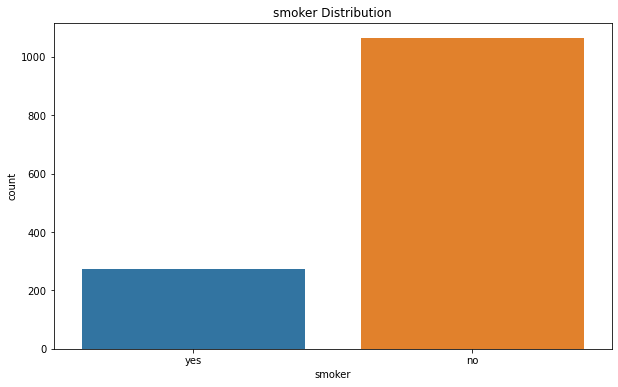

In [254]:
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data=df)
plt.title('smoker Distribution')
print(df['smoker'].value_counts())
plt.show()

#The number of non smokers are more than the smokers. 


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


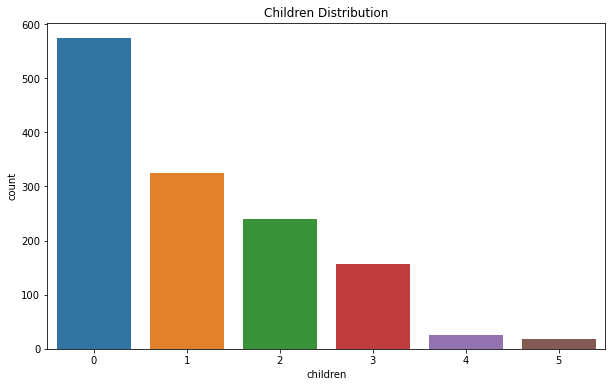

In [255]:
plt.figure(figsize=(10, 6))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
print(df['children'].value_counts())
plt.show()

It is oberved that the maximum number of individuals  no childrens. 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


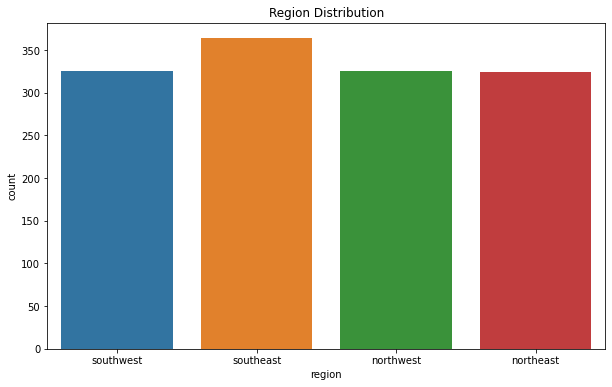

In [256]:
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
print(df['region'].value_counts())
plt.show()

Its is observed that the data is aproximatly evenly distributed. 

C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


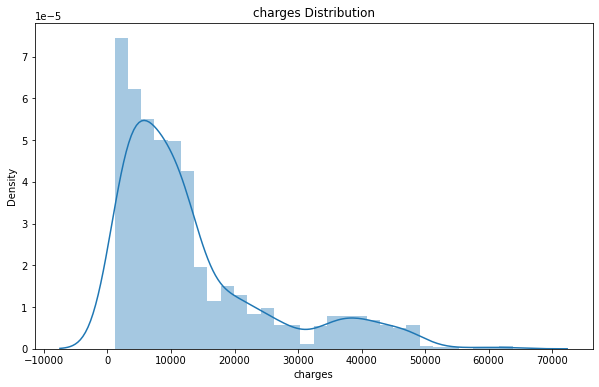

In [257]:
plt.figure(figsize=(10, 6))
sns.distplot(df['charges'])
plt.title('charges Distribution')
plt.show()

It is understood from the distribution that the maximum no. of people are paying less than 10K.

# encoding the data using map function.
We will have to replace the categorica data to numerical data. 


In [258]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

In [259]:
#to check the value of the function.
df['sex'].unique()

array([1, 0], dtype=int64)

In [260]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [261]:
df['smoker'].unique()

array([1, 0], dtype=int64)

In [262]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [263]:
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [264]:
df['region'].unique()

array([0, 1, 2, 3], dtype=int64)

In [265]:
# to verify the implementation of the map function( as the categorical data has been replaced to the numerical labels)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Country Head\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\C

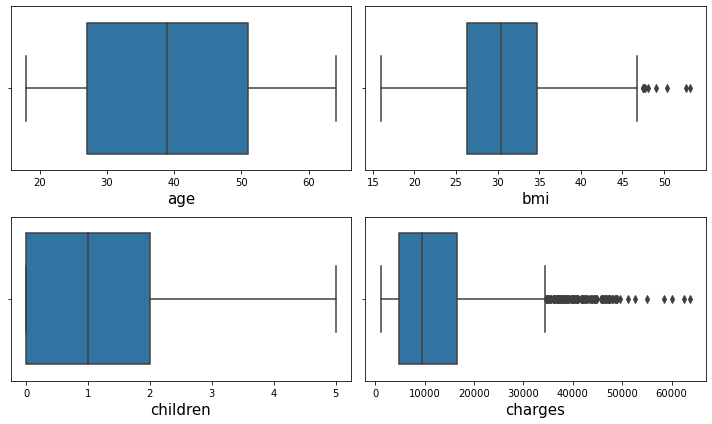

In [266]:
# Lets check the outlier by plotting boxplot.

plt.figure(figsize =(10,6))
plotnumber = 1

for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=15)
        plt.xticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.tight_layout()


Outliers have been observed in the Bmi and the charges column, hence we have to work upon removing the same using the zscore and the IQR( interquartile range)

In [267]:
from scipy.stats import zscore
out_features=df[['bmi','charges']]
z=np.abs(zscore(out_features))
z


,bmi,charges
0,0.453320,0.298584
1,0.509621,0.953689
2,0.383307,0.728675
3,1.305531,0.719843
4,0.292556,0.776802
...,...,...
1333,0.050297,0.220551
1334,0.206139,0.914002
1335,1.014878,0.961596
1336,0.797813,0.930362


In [268]:
#threshold=3
np.where(z>3)

(array([  34,  116,  543,  577,  819,  847, 1047, 1146, 1230, 1300, 1317],
       dtype=int64),
 array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0], dtype=int64))

In [269]:
z.iloc[847,1]

0.8948313171268637

In [270]:
df1 = df[(z < 3).all(axis=1)]
print(df1.shape)


(1327, 7)


In [271]:
#splitting the Feature and the target. 
X = df.drop(columns='charges',axis=1)
Y = df['charges']

#Calculate z-scores
z = np.abs(zscore(X))

#Filtering features and target for z-scores less than 3
X1 = X[(z < 3).all(axis=1)]
Y1 = Y[(z < 3).all(axis=1)]


In [272]:
# Shape of old and new dataframe
print("old Data Frame : ",df.shape[0])
print("New Data Frame : ",df1.shape[0])

old Data Frame :  1338
New Data Frame :  1327


In [273]:
print("Data Loss Percentage = ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage =  0.8221225710014948


In [274]:
df=df1

In [275]:
#It is afforadable loss of the data now lets check with the IQR method. 

In [276]:
# 1st quantile 
Q1 = out_features.quantile(0.25)

# 3rd quantile
Q3= out_features.quantile(0.75)

# Checking IQR
IQR = Q3 - Q1

# Creating a condition for a value to be an outlier
is_outlier = ((out_features < (Q1 - 1.5 * IQR)) | (out_features > (Q3 + 1.5 * IQR)))

# Applying the condition to the original DataFrame
df2 = df[~is_outlier.any(axis=1)]


C:\Users\Country Head\AppData\Local\Temp\ipykernel_11212\2084731619.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df[~is_outlier.any(axis=1)]


In [277]:
print("Data Loss Percentage after removing the outliers with IQR method = ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Data Loss Percentage after removing the outliers with IQR method =  10.097965335342879


Since, the Data Loss Percentage after removing the outliers with IQR method is  10.097965335342879. Hence we continue with the z score method. 

In [278]:
#Checking the correlation of the dataframe.
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020610,0.117993,0.043074,-0.027158,-0.001373,0.307088
sex,0.020610,1.000000,-0.039539,-0.017557,-0.075665,0.000260,-0.057332
bmi,0.117993,-0.039539,1.000000,0.020254,-0.007974,-0.156466,0.189087
children,0.043074,-0.017557,0.020254,1.000000,0.010516,-0.019069,0.076621
smoker,-0.027158,-0.075665,-0.007974,0.010516,1.000000,0.004268,0.784889
region,-0.001373,0.000260,-0.156466,-0.019069,0.004268,1.000000,0.009549
charges,0.307088,-0.057332,0.189087,0.076621,0.784889,0.009549,1.000000


# observation
Age and Charges: The correlation coefficient is 0.307088, which shows a positive relationship between a person's age and their medical charges. As age increases, medical charges tend to increase as well.

Sex and Charges: The correlation coefficient is -0.057332, indicating a very weak negative relationship between sex and medical charges. This suggests that sex has very little impact on medical charges.

BMI and Charges: With a correlation coefficient of 0.189087, there is a weak positive relationship between BMI and medical charges. This means that as BMI increases, medical charges may increase slightly.

Children and Charges: The correlation coefficient is 0.076621, showing a very weak positive relationship between the number of children a person has and their medical charges.

Smoker and Charges: This is the strongest correlation in the table with a coefficient of 0.784889. This strong positive correlation indicates that smokers tend to have much higher medical charges than non-smokers.

Region and Charges: With a correlation of 0.009549, there's no relationship between the region a person lives in and their medical charges.


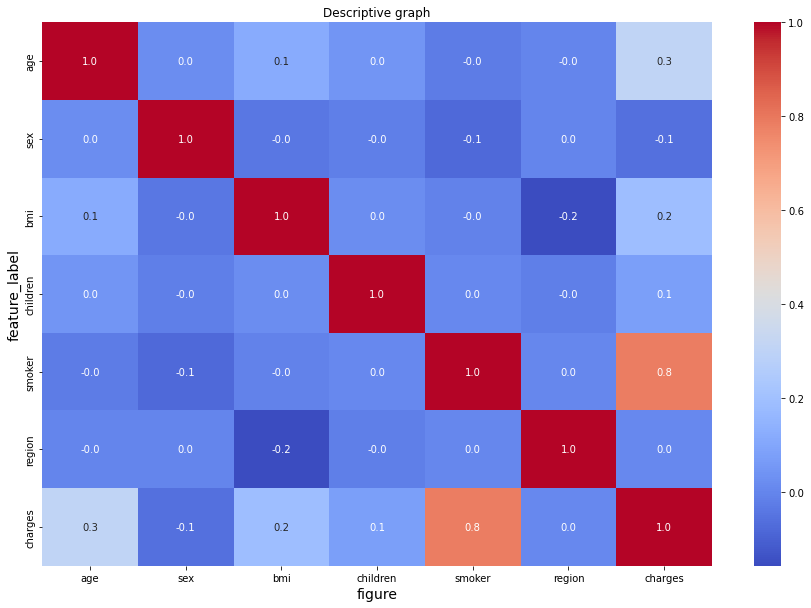

In [279]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, linecolor="black", cmap="coolwarm", fmt="0.1f")
plt.title("Descriptive graph")
plt.xlabel('figure',fontsize=14)
plt.ylabel('feature_label',fontsize=14)
plt.show()

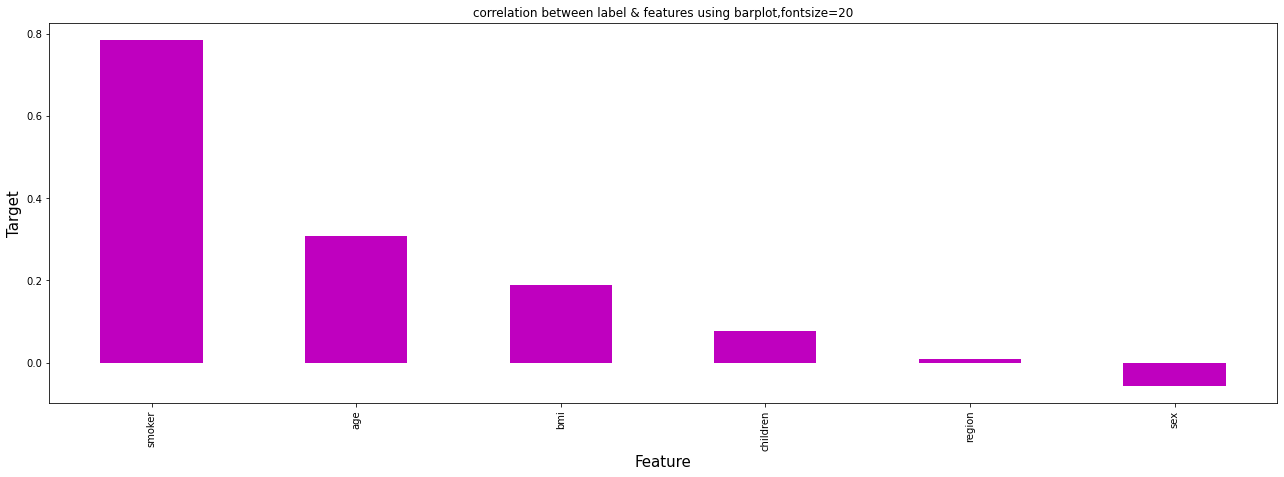

In [280]:
#Visualizing the correlation between label and feature using bar plot.
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color="m")
plt.xlabel('Feature',fontsize=15)
plt.ylabel ('Target', fontsize=15)
plt.title("correlation between label & features using barplot,fontsize=20")
plt.show()

In [281]:
#To check if the feature matrix are stored in the X & the response (target) in vector y. 
X 

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,0
1,18,0,33.770,1,0,1
2,28,0,33.000,3,0,1
3,33,0,22.705,0,0,2
4,32,0,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2
1334,18,1,31.920,0,0,3
1335,18,1,36.850,0,0,1
1336,21,1,25.800,0,0,0


In [282]:
# to check if the response(target) is stored in vector Y
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [283]:
# Features scaling using 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x_scaled

,age,sex,bmi,children,smoker,region
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,-1.343905
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,-0.438495
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,-0.438495
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,0.466915
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,0.466915
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,-0.507463,0.466915
1334,-1.509965,1.010519,0.206139,-0.908614,-0.507463,1.372326
1335,-1.509965,1.010519,1.014878,-0.908614,-0.507463,-0.438495
1336,-1.296362,1.010519,-0.797813,-0.908614,-0.507463,-1.343905


Train/Test split Method. We will split the data into two : Training data & Testing data

Train the model on the training set
Test the model on the training set

In [284]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=22)
X_train  


,age,sex,bmi,children,smoker,region
425,45,0,24.310,5,0,1
851,61,0,32.300,2,0,2
22,18,0,34.100,0,0,1
386,58,1,39.050,0,0,1
560,46,1,19.950,2,0,2
...,...,...,...,...,...,...
356,46,0,43.890,3,0,1
960,19,1,39.615,1,0,2
812,54,0,21.010,2,0,1
132,53,1,35.900,2,0,0


In [285]:
y_train

425     9788.86590
851    14119.62000
22      1137.01100
386    11856.41150
560     9193.83850
          ...     
356     8944.11510
960     2730.10785
812    11013.71190
132    11163.56800
885    19719.69470
Name: charges, Length: 1070, dtype: float64

In [286]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [287]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)



DecisionTreeRegressor()

In [288]:
# Prection on the test data. 
y_pred1 = lr.predict(X_test)
y_pred2 = rfr.predict(X_test)
y_pred3 = gr.predict(X_test)
y_pred4 = dt.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Lr': y_pred1, 'rfr': y_pred2, 'gr': y_pred3,'dt':y_pred4,})

In [289]:
df2

,Actual,Lr,rfr,gr,dt
1231,20167.33603,23018.544819,14934.996382,15406.783892,15359.10450
768,14319.03100,17204.194537,14163.630404,13439.237780,14313.84630
847,2438.05520,10516.417159,5718.054998,3769.092560,27724.28875
510,11763.00090,13588.644933,12110.317417,12951.626238,11512.40500
363,2597.77900,1771.183756,2798.131052,4034.092674,2585.26900
...,...,...,...,...,...
882,2585.85065,696.734414,2424.505844,2448.087412,2731.91220
1039,22493.65964,2338.961326,5584.411159,5458.925109,2803.69785
874,8891.13950,7855.403962,9638.227567,8293.445995,13725.47184
757,23065.42070,32492.877957,26051.784978,26414.800452,24915.22085


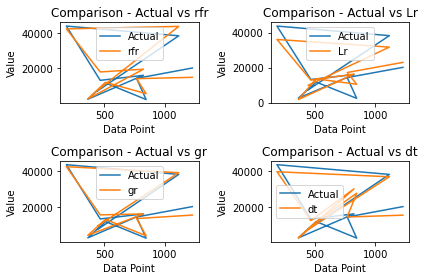

In [290]:
plt.subplot(221)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['rfr'].iloc[0:10], label="rfr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs rfr')
plt.legend()

# Repeat the above code for other subplots (222, 223, 224)
plt.subplot(222)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['Lr'].iloc[0:10], label="Lr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs Lr')
plt.legend()

plt.subplot(223)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['gr'].iloc[0:10], label="gr")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs gr')
plt.legend()

plt.subplot(224)
plt.plot(df2['Actual'].iloc[0:10], label='Actual')
plt.plot(df2['dt'].iloc[0:10], label="dt")
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.title('Comparison - Actual vs dt')
plt.legend()

plt.tight_layout()
plt.show()


#Model 3 appears to be most close 

In [291]:
#Algorythm using R2 
from sklearn import metrics

In [292]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [293]:
print(score1,score2,score3,score4)

0.7577242096466303 0.8127532884842117 0.8372486339246517 0.610173850431845


Model 3rd is performind the best amongs all other 

In [294]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2= metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [295]:
print(s1,s2,s3,s4)

4095.3431157982404 3029.083073991342 2666.830946644722 3800.0552794402993


Lower is better : which shows that 3rd model is performing the best.

In [296]:
#Model_Predict 
data_Predict = {'age':19,
               'sex':0,
                'bmi':18.8,
                'children':1,
                'smoker':0,
                'region':1}
df_pred = pd.DataFrame(data_Predict,index=[0])
df_pred

,age,sex,bmi,children,smoker,region
0,19,0,18.8,1,0,1


In [297]:
new_pred = gr.predict(df_pred )
print(new_pred)

[2249.32748353]


# Save model using Joblib

In [298]:
gr = GradientBoostingRegressor()
gr.fit(X,Y)

GradientBoostingRegressor()

In [299]:
import joblib

In [300]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [301]:
model = joblib.load('model_joblib_gr')